In [30]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import random
import networkx as nx
from pulp import *
import matplotlib.pyplot as plt

# Paramètres du problème
N = 30 # Nombre de nœuds
A = 70 # Nombre d'arcs
C = 10 # Coût maximum
Uds = [random.randint(1, 5) for _ in range(N)] # Demande de chaque nœud en données source
Udt = [random.randint(1, 5) for _ in range(N)] # Demande de chaque nœud en données destination

# Nombre minimum de nœuds et d'arcs
min_nodes = 20
min_edges = 50

# Nombre aléatoire de nœuds et d'arcs
num_nodes = random.randint(min_nodes, min_nodes+10)
num_edges = random.randint(min_edges, min_edges+50)

# Intervalle de valeurs aléatoires pour les coûts et les capacités
plage_couts = [0, C]
plage_capacites = [0, max(Uds+Udt)]

# Création du graphe aléatoire
G = nx.gnm_random_graph(num_nodes, num_edges, directed=True, seed=4957011)

# Attribution aléatoire de capacités et de coûts pour chaque arc
for u, v in G.edges:
    capacite = random.randint(plage_capacites[0], plage_capacites[1])
    cout = random.randint(plage_couts[0], plage_couts[1])
    G.edges[u, v]['capacite'] = capacite
    G.edges[u, v]['cout'] = cout

# Attribution aléatoire des demandes pour chaque nœud
for n in G.nodes:
    G.nodes[n]['demande'] = random.randint(-min(Uds+Udt), min(Uds+Udt))

In [32]:
# Affichage du graphe généré
print("Graphe généré :")
print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d'arcs :", G.number_of_edges())
print("Liste des arcs avec capacités et coûts :")
for arc in G.edges():
    print("Arc :", arc, "Capacité maximale :", G[arc[0]][arc[1]]['capacite'], "Coût unitaire :", G[arc[0]][arc[1]]['cout'])

Graphe généré :
Nombre de nœuds : 21
Nombre d'arcs : 66
Liste des arcs avec capacités et coûts :
Arc : (1, 0) Capacité maximale : 4 Coût unitaire : 7
Arc : (1, 7) Capacité maximale : 5 Coût unitaire : 9
Arc : (1, 2) Capacité maximale : 2 Coût unitaire : 2
Arc : (1, 4) Capacité maximale : 1 Coût unitaire : 5
Arc : (2, 5) Capacité maximale : 3 Coût unitaire : 9
Arc : (2, 18) Capacité maximale : 4 Coût unitaire : 9
Arc : (2, 11) Capacité maximale : 0 Coût unitaire : 10
Arc : (2, 19) Capacité maximale : 5 Coût unitaire : 1
Arc : (2, 7) Capacité maximale : 5 Coût unitaire : 10
Arc : (3, 13) Capacité maximale : 2 Coût unitaire : 3
Arc : (3, 6) Capacité maximale : 5 Coût unitaire : 4
Arc : (4, 17) Capacité maximale : 1 Coût unitaire : 2
Arc : (5, 17) Capacité maximale : 5 Coût unitaire : 3
Arc : (6, 18) Capacité maximale : 4 Coût unitaire : 3
Arc : (6, 10) Capacité maximale : 1 Coût unitaire : 9
Arc : (6, 11) Capacité maximale : 2 Coût unitaire : 9
Arc : (6, 14) Capacité maximale : 0 Coût uni

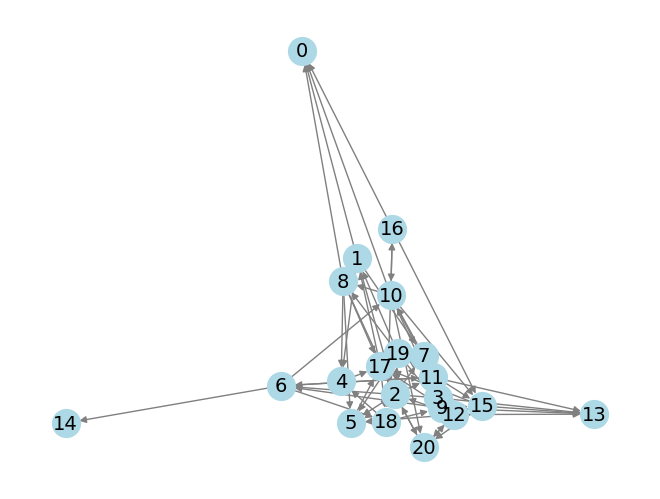

In [33]:
# Affichage du schéma du graphe avec des nœuds verts
nx.draw(G, with_labels=True, node_size=400, font_size=14, node_color='lightblue', edge_color='gray')
plt.show()

In [34]:
#Projet 1: Probleme de flot a cout minimum avec capacite


In [ ]:
import random

In [35]:
import matplotlib.pyplot as plt

In [60]:
# Définition du problème d'optimisation linéaire
prob = LpProblem("Flot de coût minimum", LpMinimize)

# Définition des variables de décision
X = LpVariable.dicts("Flot", ((u,v) for (u,v) in G.edges), lowBound=0, cat='Continuous')

# Définition de la fonction objectif
prob += lpSum([G.edges[u, v]['cout'] * X[(u,v)] for (u,v) in G.edges])

# Contraintes de capacité sortante
for u in G.nodes:
    prob += lpSum([X[(u,v)] for v in G.successors(u)]) <= lpSum([G.edges[u,v]['capacite'] for v in G.successors(u)])

# Contraintes de capacité entrante
for u in G.nodes:
    prob += lpSum([X[(v,u)] for v in G.predecessors(u)]) <= lpSum([G.edges[v,u]['capacite'] for v in G.predecessors(u)])

# Contraintes d'équilibre de flot
for n in G.nodes:
    prob += lpSum([X[(i,n)] for i in G.predecessors(n)]) - lpSum([X[(n,j)] for j in G.successors(n)]) == G.nodes[n]['demande']

# Résolution du problème d'optimisation
prob.solve()

# Affichage du graphe initial et du graphe optimal
G_initial = G.copy()

G_optimal = nx.DiGraph()

In [61]:

# Affichage du graphe généré
print("Graphe généré :")
print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d'arcs :", G.number_of_edges())
print("Liste des arcs avec capacités et coûts :")
for arc in G.edges():
    print("Arc :", arc, "Capacité maximale :", G[arc[0]][arc[1]]['capacite'], "Coût unitaire :", G[arc[0]][arc[1]]['cout'])

Graphe généré :
Nombre de nœuds : 21
Nombre d'arcs : 66
Liste des arcs avec capacités et coûts :
Arc : (1, 0) Capacité maximale : 4 Coût unitaire : 7
Arc : (1, 7) Capacité maximale : 5 Coût unitaire : 9
Arc : (1, 2) Capacité maximale : 2 Coût unitaire : 2
Arc : (1, 4) Capacité maximale : 1 Coût unitaire : 5
Arc : (2, 5) Capacité maximale : 3 Coût unitaire : 9
Arc : (2, 18) Capacité maximale : 4 Coût unitaire : 9
Arc : (2, 11) Capacité maximale : 0 Coût unitaire : 10
Arc : (2, 19) Capacité maximale : 5 Coût unitaire : 1
Arc : (2, 7) Capacité maximale : 5 Coût unitaire : 10
Arc : (3, 13) Capacité maximale : 2 Coût unitaire : 3
Arc : (3, 6) Capacité maximale : 5 Coût unitaire : 4
Arc : (4, 17) Capacité maximale : 1 Coût unitaire : 2
Arc : (5, 17) Capacité maximale : 5 Coût unitaire : 3
Arc : (6, 18) Capacité maximale : 4 Coût unitaire : 3
Arc : (6, 10) Capacité maximale : 1 Coût unitaire : 9
Arc : (6, 11) Capacité maximale : 2 Coût unitaire : 9
Arc : (6, 14) Capacité maximale : 0 Coût uni

In [62]:
from pulp import *
import random
# Données d'entrée
N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # ensemble de nœuds
arcs = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 7), (6, 5), (6, 8), (7, 6), (7, 9), (8, 7), (8, 10), (9, 8), (9, 10)] # ensemble d'arcs
capacites = {(1, 2): 10, (1, 3): 5, (2, 3): 3, (2, 4): 2, (2, 5): 2, (3, 5): 4, (4, 6): 6, (5, 4): 1, (5, 7): 3, (6, 5): 1, (6, 8): 2, (7, 6): 1, (7, 9): 2, (8, 7): 2, (8, 10): 4, (9, 8): 3, (9, 10): 5} # capacités des arcs
couts = {(1, 2): 5, (1, 3): 2, (2, 3): 2, (2, 4): 1, (2, 5): 6, (3, 5): 1, (4, 6): 3, (5, 4): 3, (5, 7): 2, (6, 5): 1, (6, 8): 2, (7, 6): 3, (7, 9): 3, (8, 7): 1, (8, 10): 4, (9, 8): 2, (9, 10): 6} # coûts des arcs
S = [1, 2, 3, 4, 5] # ensemble de sources
T = [6, 7, 8, 9, 10, 11, 12, 13] # ensemble de destinations


# Création du problème
prob = LpProblem("Probleme de flot a cout minimum avec capacite", LpMinimize)

# Variables de décision
flot = LpVariable.dicts("flot", arcs, lowBound=0, cat='Continuous')

# Fonction objective
prob += lpSum([couts[a] * flot[a] for a in arcs])

# Contraintes de capacité des arcs
for a in arcs:
    prob += flot[a] <= capacites[a]

# Contraintes de conservation de flux en chaque nœud
for n in N:
 if n in S:
   prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) >= 1
 elif n in T:
   prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) <= -1
 else:
  prob += lpSum([flot[a] for a in arcs if a[1] == n]) - lpSum([flot[a] for a in arcs if a[0] == n]) == 0
  #



In [63]:
# Calcul de la capacité totale entrante des nœuds sources
capacite_entree = 0
for a in arcs:
    if a[1] in S:
        capacite_entree += capacites[a]

# Définition des valeurs d'offre de trafic pour chaque nœud source
offres_trafic = {}
for n in S:
    offre_max = capacite_entree / len(S)  # offre maximale pour chaque nœud source
    offre = random.uniform(0, offre_max)  # offre aléatoire entre 0 et l'offre maximale
    offres_trafic[n] = offre

# Affectation des valeurs d'offre de trafic aux variables de décision
for a in arcs:
    if a[0] in S:
        prob += lpSum([flot[a]]) == offres_trafic[a[0]]
print (prob)

Probleme_de_flot_a_cout_minimum_avec_capacite:
MINIMIZE
5*flot_(1,_2) + 2*flot_(1,_3) + 2*flot_(2,_3) + 1*flot_(2,_4) + 6*flot_(2,_5) + 1*flot_(3,_5) + 3*flot_(4,_6) + 3*flot_(5,_4) + 2*flot_(5,_7) + 1*flot_(6,_5) + 2*flot_(6,_8) + 3*flot_(7,_6) + 3*flot_(7,_9) + 4*flot_(8,_10) + 1*flot_(8,_7) + 6*flot_(9,_10) + 2*flot_(9,_8) + 0
SUBJECT TO
_C1: flot_(1,_2) <= 10

_C2: flot_(1,_3) <= 5

_C3: flot_(2,_3) <= 3

_C4: flot_(2,_4) <= 2

_C5: flot_(2,_5) <= 2

_C6: flot_(3,_5) <= 4

_C7: flot_(4,_6) <= 6

_C8: flot_(5,_4) <= 1

_C9: flot_(5,_7) <= 3

_C10: flot_(6,_5) <= 1

_C11: flot_(6,_8) <= 2

_C12: flot_(7,_6) <= 1

_C13: flot_(7,_9) <= 2

_C14: flot_(8,_7) <= 2

_C15: flot_(8,_10) <= 4

_C16: flot_(9,_8) <= 3

_C17: flot_(9,_10) <= 5

_C18: - flot_(1,_2) - flot_(1,_3) >= 1

_C19: flot_(1,_2) - flot_(2,_3) - flot_(2,_4) - flot_(2,_5) >= 1

_C20: flot_(1,_3) + flot_(2,_3) - flot_(3,_5) >= 1

_C21: flot_(2,_4) - flot_(4,_6) + flot_(5,_4) >= 1

_C22: flot_(2,_5) + flot_(3,_5) - flot_(5,_4)

In [64]:
import random

# dt_bar est la valeur maximale de la demande de trafic
dt_bar = 10

# Affectation des demandes de trafic sur les noeuds de destination
demandes = {}
for n in T:
    demandes[n] = random.uniform(0, dt_bar)

print(demandes)


{6: 3.742741977892825, 7: 6.139038189669516, 8: 2.5486023863860217, 9: 9.839888564143113, 10: 2.8934124515930937, 11: 5.05985533352322, 12: 8.33978443672344, 13: 0.06804859116287476}


In [65]:
#ajout de contarinte  Pour s'assurer que le total de l'offre soit égal au total de la demande à notre problème : 
prob += lpSum(demandes) == lpSum(offres_trafic), "Contrainte d'équilibre offre-demande"

In [66]:
# Résolution du problème
prob.solve()
# Affichage des résultats
print("Statut : ", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Coût total du réseau = ", value(prob.objective))

Statut :  Infeasible
flot_(1,_2) = 0.0
flot_(1,_3) = 0.0
flot_(2,_3) = 0.0
flot_(2,_4) = 0.0
flot_(2,_5) = 0.0
flot_(3,_5) = 0.0
flot_(4,_6) = 0.0
flot_(5,_4) = 0.0
flot_(5,_7) = 0.0
flot_(6,_5) = 0.0
flot_(6,_8) = 0.0
flot_(7,_6) = 0.0
flot_(7,_9) = 0.0
flot_(8,_10) = 0.0
flot_(8,_7) = 0.0
flot_(9,_10) = 0.0
flot_(9,_8) = 0.0
Coût total du réseau =  0.0


In [67]:
#Résolution du problème
prob.solve()
# Affichage des résultats
print("Statut : ", LpStatus[prob.status])
if LpStatus[prob.status] == "Optimal":
    for v in prob.variables():
        print(v.name, "=", v.varValue)
    print("Coût total du réseau = ", value(prob.objective))
else:
    print("Le problème n'est pas réalisable.")


Statut :  Infeasible
Le problème n'est pas réalisable.


In [68]:
# Définition des variables de décision
flot = LpVariable.dicts("flot", arcs, lowBound=0, cat='Continuous')

# Définition des contraintes de capacité
for arc in arcs:
    i, j = arc
    prob += flot[arc] <= capacites[arc],f"Contrainte de capacité pour l'arc {arc}"

# Définition des contraintes de conservation de flux en chaque nœud
for noeud in N:
    if noeud in S or noeud in T:
        continue
    contrainte_entree = lpSum([flot[(i, j)] for (i, j) in arcs if j == noeud])
    contrainte_sortie = lpSum([flot[(i, j)] for (i, j) in arcs if i == noeud])
    prob += contrainte_entree == contrainte_sortie, f"Contrainte de conservation de flux pour le noeud {noeud}"

# Contraintes de non-négativité
for arc in arcs:
    prob += flot[arc] >= 0, f"Contrainte de non-négativité pour l'arc {arc}"


In [69]:
#configuration random (resultat d'affichage non structureé)

In [39]:
#configuration avec circular layout  (resultat d'affichage  structureé)

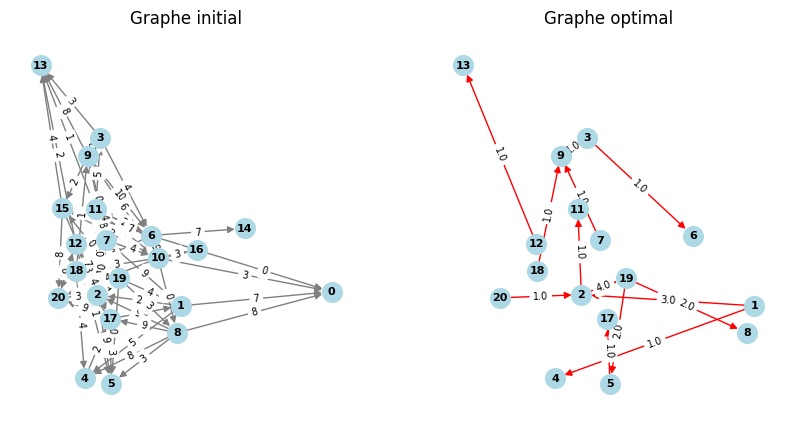

In [72]:
for (u, v) in G.edges:
    if X[(u,v)].varValue > 0:
        G_optimal.add_edge(u, v, capacity=G.edges[u,v]['capacite'], flow=X[(u,v)].varValue)

# Visualisation des deux graphes
plt.figure(figsize=(10,5))

plt.subplot(121)
pos = nx.spring_layout(G_initial)
nx.draw(G_initial,pos, with_labels=True, node_size=200, node_color='lightblue', edge_color='gray', font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G_initial, pos, edge_labels={(u, v): G.edges[u,v]['cout'] for (u, v) in G.edges}, font_size=7)

plt.title('Graphe initial')

plt.subplot(122)

nx.draw(G_optimal, pos, with_labels=True, node_size=200, node_color='lightblue', edge_color='red', font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G_optimal, pos, edge_labels={(u, v): G_optimal.edges[u,v]['flow'] for (u, v) in G_optimal.edges}, font_size=7)

plt.title('Graphe optimal')

plt.show()